**In this heat attack Prediction:** On the basis of past diagnostic test data of several patients, creating models for predicting the chances of having heart attack in near future.

About dataset:

Age, Sex
CPT=Chest pain type
RBP=Resting blood pressure
Cholestoral
FBS=Fasting blood sugar > 120 mg/dl
RER=Resting electrocardiographic results (values 0,1,2)
MAX.HR=Maximum heart rate achieved
Exercise induced angina
Oldpeak = ST depression induced by exercise relative to rest
Slope of the peak exercise ST segment
Number of major vessels (0-3) colored by flourosopy
Thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
Target:- Target: 0= less chance of heart attack 1= more chance of heart attack

I have compared multiple model like LR, DT, RF, KNN, SVM, Naïve Bayes and concluded that **SVM** and **DT** give the best accuracy.

In [ ]:
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
from matplotlib import rcParams # figure size
from termcolor import colored as cl # text customization
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier as dtree # tree algorithm
from sklearn.model_selection import train_test_split # splitting the data
from sklearn.metrics import accuracy_score # model precision
from sklearn.tree import plot_tree # tree diagram

In [ ]:
df= pd.read_csv('DATASET_HEART ATTACK POSSIBILITY.csv')

In [ ]:
df.head()

,Age,Sex,CPT,RBP,Cholestoral,FBS,RER,MAX.HR,Exercise,Oldpeak,Slope,Major vessels,Thal,Target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.isnull().any()

Age              False
Sex              False
CPT              False
RBP              False
Cholestoral      False
FBS              False
RER              False
MAX.HR           False
Exercise         False
 Oldpeak         False
Slope            False
Major vessels    False
Thal             False
Target           False
dtype: bool

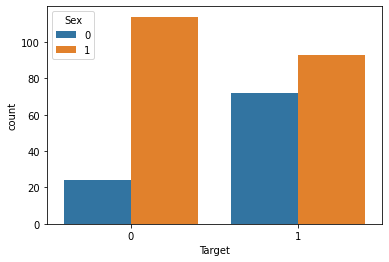

In [ ]:
sns.countplot(x='Target', hue = 'Sex' , data= df)

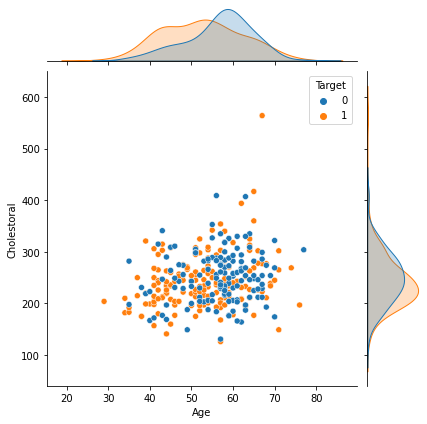

In [ ]:
sns.jointplot(x='Age' , y = 'Cholestoral', data= df, hue='Target')

In [ ]:
#sns.pairplot(df, hue='Target')

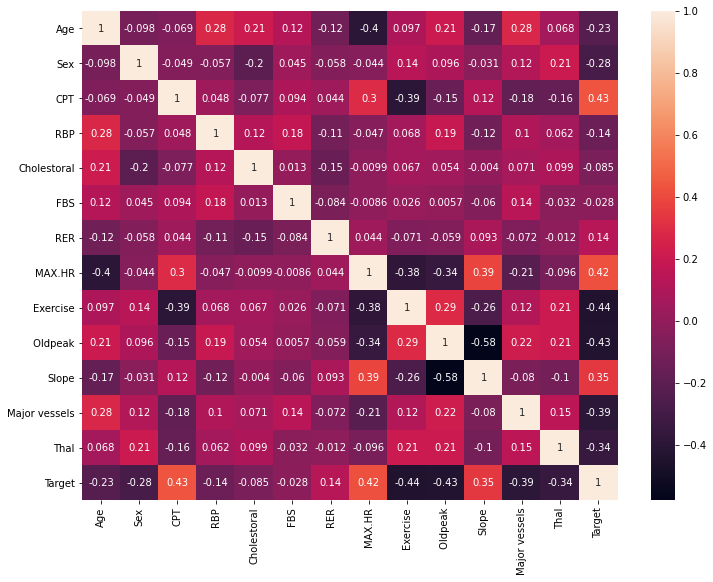

In [ ]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(), annot=True)

In [ ]:
df.columns

Index(['Age', 'Sex', 'CPT', 'RBP', 'Cholestoral', 'FBS', 'RER', 'MAX.HR',
       'Exercise', ' Oldpeak', 'Slope', 'Major vessels', 'Thal', 'Target'],
      dtype='object')

In [ ]:
import statsmodels.api as sm
model = sm.OLS("Target ~ Age+Sex+CPT+RBP+Cholestoral+FBS+RER+MAX.HR+Exercise+Oldpeak+Slope+Major vessels+Thal", data= df).fsummary()

In [ ]:
X= df.drop(['Target'], axis=1)
y=df['Target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=df.Target.values)

Logistic Regression:

In [ ]:
from sklearn.linear_model import LogisticRegression
glm= LogisticRegression()
model= glm.fit(X_train, y_train)
predictions= glm.predict(X_test)

In [ ]:
import statsmodels.api as sm

In [ ]:
accuracy_train = accuracy_score(y_test,predictions)
print('\naccuracy_score on test dataset : ', accuracy_train)


accuracy_score on test dataset :  0.77


Decision Tree:

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
predictions=dtree.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(y_test,predictions)
print('\naccuracy_score on test dataset : ', accuracy_train)


accuracy_score on test dataset :  0.81


[Text(621.4090909090909, 489.24, 'CPT <= 0.5\nentropy = 0.994\nsamples = 203\nvalue = [92, 111]\nclass = 0'),
 Text(380.45454545454544, 380.52000000000004, ' Oldpeak <= 0.7\nentropy = 0.803\nsamples = 94\nvalue = [71, 23]\nclass = 1'),
 Text(202.9090909090909, 271.8, 'Major vessels <= 0.5\nentropy = 0.99\nsamples = 34\nvalue = [15, 19]\nclass = 0'),
 Text(101.45454545454545, 163.08000000000004, 'MAX.HR <= 173.5\nentropy = 0.863\nsamples = 21\nvalue = [6, 15]\nclass = 0'),
 Text(50.72727272727273, 54.360000000000014, 'entropy = 0.937\nsamples = 17\nvalue = [6, 11]\nclass = 0'),
 Text(152.1818181818182, 54.360000000000014, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = 0'),
 Text(304.3636363636364, 163.08000000000004, 'Sex <= 0.5\nentropy = 0.89\nsamples = 13\nvalue = [9, 4]\nclass = 1'),
 Text(253.63636363636363, 54.360000000000014, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = 0'),
 Text(355.09090909090907, 54.360000000000014, 'entropy = 0.684\nsamples = 11\nvalue = [9, 2]

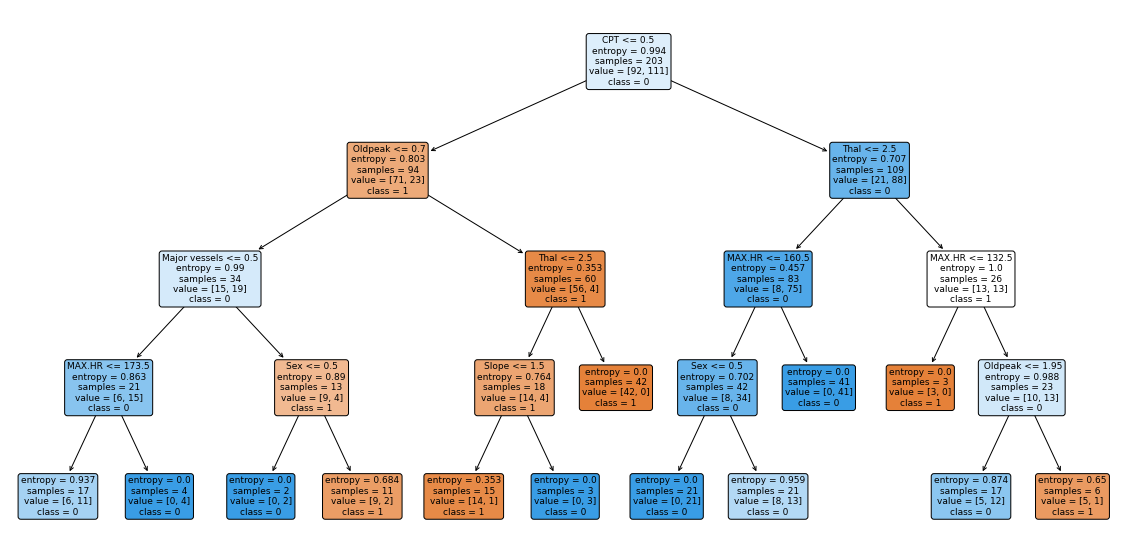

In [ ]:
plt.figure(figsize=(20,10))
from sklearn.tree import plot_tree 
plot_tree(dtree,
         feature_names=X.columns, class_names=('1', '0'), filled = True, rounded = True)

Random Forest:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)

In [ ]:
accuracy_train = accuracy_score(y_test,predictions)
print('\naccuracy_score on test dataset : ', accuracy_train)


accuracy_score on test dataset :  0.8


KNN algorithm using ELBOW method (For K value)

In [ ]:
'''
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
scaler.fit(df.drop(['Target'], axis =1))
'''

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Text(0, 0.5, 'Error Rate')

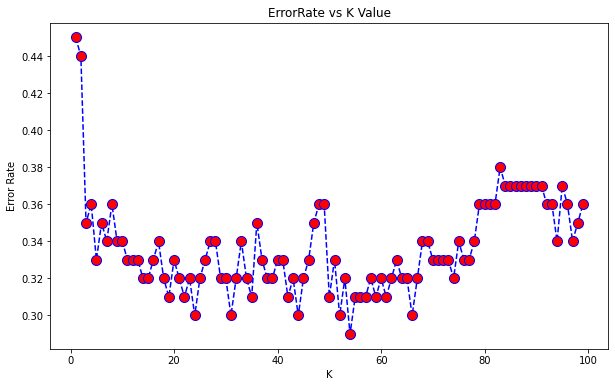

In [ ]:
error_rate=[]

for i in range(1,100):

  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
#  it the average error rate, its the average where my prediction are not equal to test values, then take the mean of it and append the value
  error_rate.append(np.mean(pred_i != y_test)) 


# Ploting the K value vs error rate graph:
plt.figure(figsize=(10,6)) # helps to give the larger size chart
plt.plot(range(1,100), error_rate, color='blue', linestyle= 'dashed', marker = 'o', markerfacecolor='red',
         markersize = 10)
plt.title('ErrorRate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
knn= KNeighborsClassifier(n_neighbors=50) # here n_neighbors representiing K
# Model
knn.fit(X_train, y_train)
# Prediction
predictions=knn.predict(X_test)

In [ ]:
accuracy_train = accuracy_score(y_test,predictions)
print('\naccuracy_score on test dataset : ', accuracy_train)


accuracy_score on test dataset :  0.69


SVM

In [ ]:
from sklearn.svm import SVC
svc_model = SVC(C=120,kernel='linear')
svc_model.fit(X_train, y_train)
predictions = svc_model.predict(X_test)


In [ ]:
accuracy_train = accuracy_score(y_test,predictions)
print('\naccuracy_score on test dataset : ', accuracy_train)


accuracy_score on test dataset :  0.83


Naïve Bayes Classification

In [ ]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
#model = MultinomialNB()
#model = BernoulliNB()
model = GaussianNB()

#Model
model.fit(X_train,y_train)

#Prediction
predictions=model.predict(X_test)

In [ ]:
accuracy_train = accuracy_score(y_test,predictions)
print('\naccuracy_score on test dataset : ', accuracy_train)


accuracy_score on test dataset :  0.8
